In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Exploratory Data Analysis**

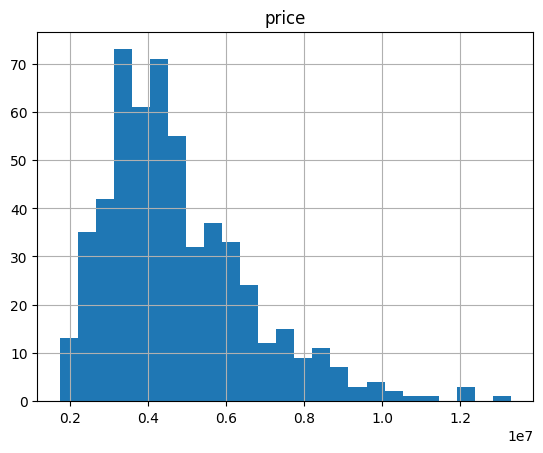

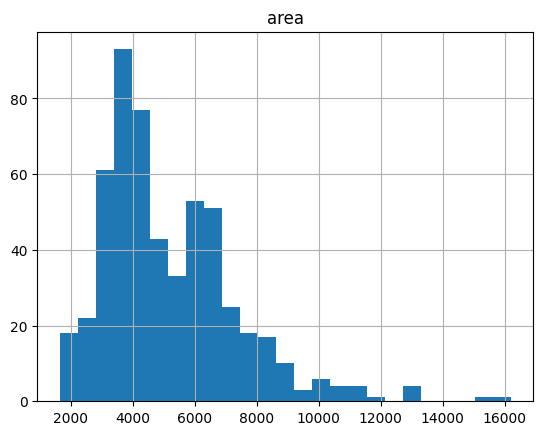

In [10]:
numerical_features=['price', 'area']
for feature in numerical_features:
  df[feature].hist(bins=25)
  plt.title(feature)
  plt.show()

In [11]:
# checking the relation of price with object datatype
object_columns = [col for col in df.columns if df[col].dtype == 'object']
object_columns

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [12]:
import plotly.express as px

In [13]:
for features in object_columns:
  print(df[features].value_counts())


yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [14]:
for features in object_columns:
  if features in df.columns:
    fig = px.bar(df,x=features, y='price', title='Bar Plot')

    # Displaying the plot
    fig.show()


In [15]:
fig=px.bar(df,x="price",y="basement",color="basement")
fig.update_xaxes(title_text='Price')
fig.update_yaxes(title_text='basement')
fig.show()

In [16]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [18]:
encoding=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

In [19]:
for feature  in encoding:
  print(pd.DataFrame(df[feature].value_counts()))

     mainroad
yes       468
no         77
     guestroom
no         448
yes         97
     basement
no        354
yes       191
     hotwaterheating
no               520
yes               25
     airconditioning
no               373
yes              172
     prefarea
no        417
yes       128


In [20]:
for feature  in encoding:
  df[feature]=df[feature].map({"yes":1,"no":0})

In [21]:
for feature  in encoding:
  print(df[feature].value_counts())

1    468
0     77
Name: mainroad, dtype: int64
0    448
1     97
Name: guestroom, dtype: int64
0    354
1    191
Name: basement, dtype: int64
0    520
1     25
Name: hotwaterheating, dtype: int64
0    373
1    172
Name: airconditioning, dtype: int64
0    417
1    128
Name: prefarea, dtype: int64


In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [23]:
df.groupby("furnishingstatus")['area'].size()

furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
Name: area, dtype: int64

In [24]:
df["furnishingstatus"]=df['furnishingstatus'].map({'furnished':0,'semi-furnished':1,'unfurnished':2})

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [26]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Generating synthetic dataset (you'll replace this with your own dataset)
X, y = df.drop(columns="price"),df["price"]

# Splitting the dataset into train and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Evaluating the model on the test set
test_score = rf_regressor.score(X_test, y_test)
print(f"Test set score: {test_score:.2f}")

# Performing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=kfold)

print("Cross-validation scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.2f}")

print(f"Average cross-validation score: {cv_scores.mean():.2f}")


Test set score: 0.61
Cross-validation scores:
Fold 1: 0.59
Fold 2: 0.63
Fold 3: 0.65
Fold 4: 0.66
Fold 5: 0.47
Average cross-validation score: 0.60


In [27]:

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are the scaled versions of your features
# You can use these scaled features for model training


In [28]:
# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train_scaled, y_train)

# Evaluating the model on the test set
test_score = rf_regressor.score(X_test_scaled, y_test)
print(f"Test set score: {test_score:.2f}")

# Performing k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=kfold)

print("Cross-validation scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.2f}")

print(f"Average cross-validation score: {cv_scores.mean():.2f}")

Test set score: 0.61
Cross-validation scores:
Fold 1: 0.59
Fold 2: 0.63
Fold 3: 0.65
Fold 4: 0.67
Fold 5: 0.46
Average cross-validation score: 0.60


In [31]:
# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300)

# Training the model
rf_regressor.fit(X_train_scaled, y_train)
# Predict on the scaled testing data
y_pred = rf_regressor.predict(X_test_scaled)

from sklearn.metrics import r2_score

# Calculate R-squared on the test set
r_squared = r2_score(y_test, y_pred)
print(f"R-squared on test set: {r_squared:.2f}")

R-squared on test set: 0.60
